In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Initial analysis and understanding the data

In [3]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Missing data detection (null detection)


In [4]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### duplicate data detection 

In [6]:
delivery_time[delivery_time.duplicated()]

,Delivery Time,Sorting Time


####     No duplicate  data found 

### outliers  detection 

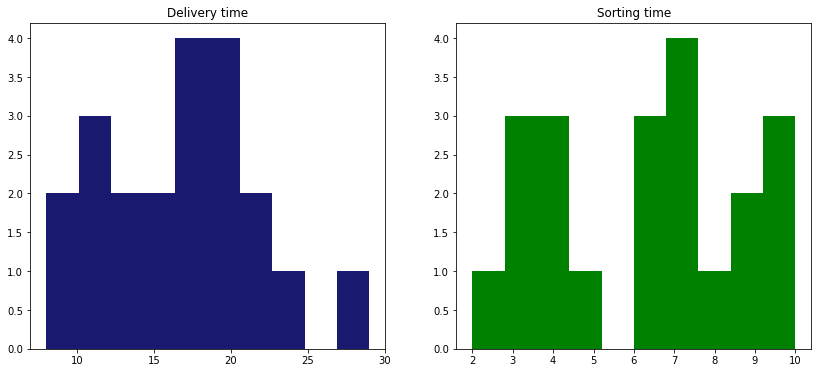

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(delivery_time["Delivery Time"],bins=10,color="midnightblue")
plt.title("Delivery time")
plt.subplot(1,2,2)
plt.hist(delivery_time["Sorting Time"],bins=10,color="green")
plt.title("Sorting time")
plt.show()

####  box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x14f0ba08730>,
 'caps': [<matplotlib.lines.Line2D at 0x14f0ba08d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x14f0ba082e0>],
 'medians': [<matplotlib.lines.Line2D at 0x14f0ba154f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f0ba15880>],
 'means': []}

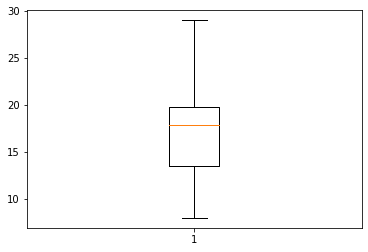

In [10]:
plt.boxplot(x="Delivery Time", data=delivery_time)

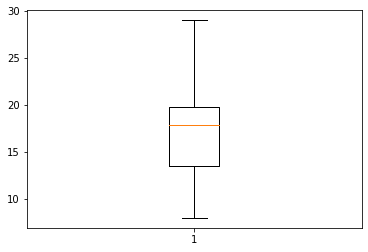

In [11]:
box=plt.boxplot(x="Delivery Time", data=delivery_time)

In [12]:
[i.get_ydata() for i in box['fliers']]

[array([], dtype=float64)]

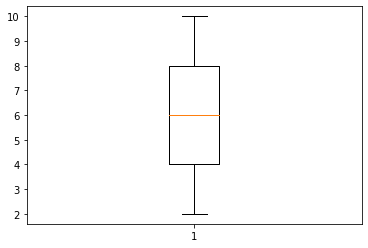

In [13]:
box1=plt.boxplot(x="Sorting Time", data=delivery_time)

In [14]:
[i.get_ydata() for i in box1['fliers']]

[array([], dtype=int64)]

####  From box plot  no outliers in the data set 

In [22]:
delivery_time.shape

(21, 2)

In [23]:
delivery_time_copy=delivery_time.copy()

In [24]:
delivery_time_copy.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


###  correlation analysis

In [25]:
delivery_time_copy.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

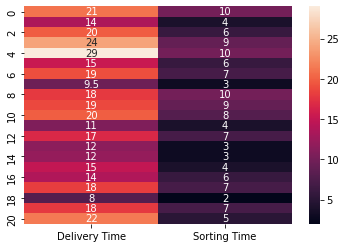

In [26]:
sns.heatmap(data=delivery_time_copy,annot=True)

# pre steps  before model building 

##  Assumption check

###   1.Normality test

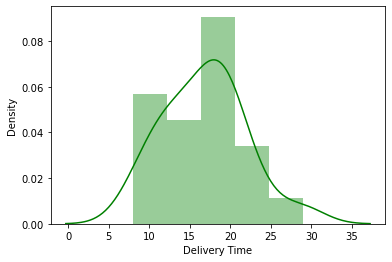

In [27]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(delivery_time_copy["Delivery Time"],color="green")
plt.show()

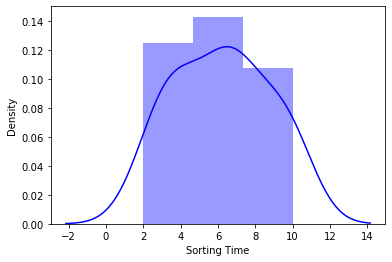

In [28]:
sns.distplot(delivery_time_copy["Sorting Time"],color="blue")
plt.show()

####  not perfect normal distribution 

###   2. linearity test

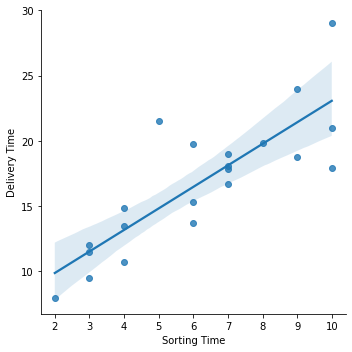

In [29]:
sns.lmplot(x="Sorting Time",y="Delivery Time",data=delivery_time_copy)
plt.show()

###  we can transform the data to attain better linearity  

####  here we try 2 types of Transformation

#####        **1. LOG Transformation**

#####        **2.Standardisation**

###  Transformation:

###  Log Transform:

In [30]:
x_scaled=np.log(delivery_time_copy["Sorting Time"])
x_scaled.head()

0    2.302585
1    1.386294
2    1.791759
3    2.197225
4    2.302585
Name: Sorting Time, dtype: float64

In [31]:
L_x=pd.DataFrame(x_scaled)
L_x.head()

,Sorting Time
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585


In [32]:
delivery_time_copy["Log_x"]=L_x

In [35]:
delivery_time_copy=delivery_time_copy.drop("Sorting Time",axis=1)

In [36]:
delivery_time_copy.head()

,Delivery Time,Log_x
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585


### Linearity test 

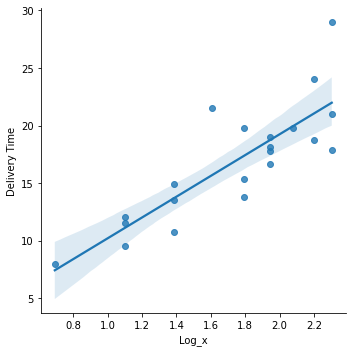

In [34]:
sns.lmplot(x="Log_x",y="Delivery Time",data=delivery_time_copy)
plt.show()

###  3.No Autoregression

## Model Building

#### separating the variables:

In [42]:
delivery_time_copy.head()

,Delivery Time,Log_x
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585


In [37]:
x=delivery_time_copy["Log_x"]
y=delivery_time_copy["Delivery Time"]

In [38]:
x.shape,y.shape

((21,), (21,))

In [39]:
import statsmodels.formula.api as smf

In [46]:
model=smf.ols(formula='y~x',data=delivery_time_copy).fit()

In [47]:
model.params

Intercept    1.159684
x            9.043413
dtype: float64

In [48]:
model.pvalues

Intercept    0.641980
x            0.000003
dtype: float64

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        10:06:30   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
x              9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Regression plot:

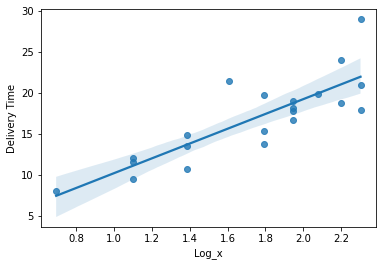

In [50]:
sns.regplot(x=x,y=y,data=delivery_time_copy)
plt.show()

In [52]:
print("Rsquared value:",model.rsquared,"\n Adjusted rsquared:",model.rsquared_adj)

Rsquared value: 0.6954434611324223 
 Adjusted rsquared: 0.6794141696130761


##  Model prediction:

In [54]:
x=pd.DataFrame(x)

In [55]:
y_pred=model.predict(x)

In [57]:
y_pred.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [58]:
error=y-y_pred

In [60]:
error.head()

0   -0.982913
1   -0.196517
2    2.386695
3    2.969906
4    7.017087
dtype: float64

###  Model evaluation:

In [61]:
from sklearn.metrics import mean_absolute_error

In [62]:
mean_absolute_error(y_true=y, y_pred=y_pred)

2.0473757067928995

In [63]:
print("Mean Absolute error:",round(mean_absolute_error(y_true=y, y_pred=y_pred),3))

Mean Absolute error: 2.047


###  Homoscadasticity Test:

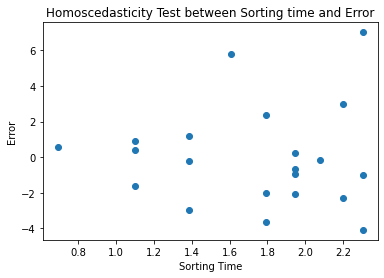

In [64]:
plt.scatter(x = delivery_time_copy["Log_x"],y = error)
plt.xlabel('Sorting Time')
plt.ylabel('Error')
plt.title('Homoscedasticity Test between Sorting time and Error')
plt.show()

##  zero residual mean test:

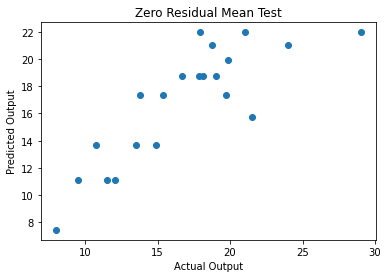

In [65]:
plt.scatter(x = y,y = y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Zero Residual Mean Test')
plt.show()


###  Relation plot :

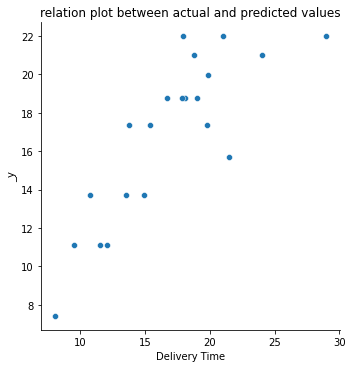

In [67]:
sns.relplot(x=y,y=y_pred)
plt.title("relation plot between actual and predicted values")
plt.show()

###  Model evaluation DataFrame:

In [68]:
pd.DataFrame({"Actual":y,"Predicted":y_pred,"Difference":y-y_pred})

,Actual,Predicted,Difference
0,21.00,21.982913,-0.982913
1,13.50,13.696517,-0.196517
2,19.75,17.363305,2.386695
3,24.00,21.030094,2.969906
4,29.00,21.982913,7.017087
5,15.35,17.363305,-2.013305
6,19.00,18.757354,0.242646
7,9.50,11.094889,-1.594889
8,17.90,21.982913,-4.082913
9,18.75,21.030094,-2.280094


##  2.   Standard Scaler Transform:

In [72]:
delivery_time_3=delivery_time.copy()
delivery_time_3.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [89]:
st=delivery_time_3["Sorting Time"]

In [91]:
st=pd.DataFrame(st)

In [92]:
x_scaled=scaler.fit_transform(st)

In [95]:
x_scaled=pd.DataFrame(x_scaled)

In [96]:
delivery_time_3=delivery_time_3.drop("Sorting Time",axis=1)

In [97]:
delivery_time_3["Sorting Time"]=x_scaled

In [99]:
delivery_time_3.head()

,Delivery Time,Sorting Time
0,21.00,1.535625
1,13.50,-0.882984
2,19.75,-0.076781
3,24.00,1.132523
4,29.00,1.535625


###  linearity test:

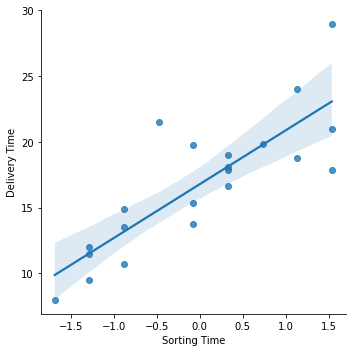

In [100]:
sns.lmplot(x="Sorting Time", y="Delivery Time",data=delivery_time_3)

###  Model Building:

In [102]:
x1=delivery_time_3["Sorting Time"]
y1=delivery_time_3["Delivery Time"]

In [104]:
model1=smf.ols(formula='y1~x1', data=delivery_time_3).fit()

In [105]:
model1.params

Intercept    16.790952
x1            4.090831
dtype: float64

In [106]:
model1.pvalues

Intercept    2.211223e-16
x1           3.983050e-06
dtype: float64

In [107]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        10:49:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7910      0.640     26.217      0.000      15.450      18.131
x1             4.0908      0.640      6.387      0.000       2.750       5.431
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
print("Rsquared value:",model1.rsquared,"\n Adjusted rsquared:",model1.rsquared_adj)

Rsquared value: 0.6822714748417231 
 Adjusted rsquared: 0.6655489208860244


###  comparison between two models:

####  for 1st model:

In [109]:
print("Rsquared value:",model.rsquared,"\n Adjusted rsquared:",model.rsquared_adj)

Rsquared value: 0.6954434611324223 
 Adjusted rsquared: 0.6794141696130761


####  for 2nd model:

In [110]:
print("Rsquared value:",model1.rsquared,"\n Adjusted rsquared:",model1.rsquared_adj)

Rsquared value: 0.6822714748417231 
 Adjusted rsquared: 0.6655489208860244


## so from  above analysis we can say the two model is almost same  but  the first model has some better predicting power 
###  so we use  LOG  transform model 

##  Log model performance:

In [111]:
pd.DataFrame({"Actual":y,"Predicted":y_pred,"Difference":y-y_pred})

,Actual,Predicted,Difference
0,21.00,21.982913,-0.982913
1,13.50,13.696517,-0.196517
2,19.75,17.363305,2.386695
3,24.00,21.030094,2.969906
4,29.00,21.982913,7.017087
5,15.35,17.363305,-2.013305
6,19.00,18.757354,0.242646
7,9.50,11.094889,-1.594889
8,17.90,21.982913,-4.082913
9,18.75,21.030094,-2.280094


###  prediction for some unknown data:

In [122]:
un_x=pd.Series([7,12,14,6,15,17,9,8,7,4,5,6,1,2,3,21,15,13,17,18,19])

In [123]:
un_x=pd.DataFrame(un_x)

In [125]:
model.predict(un_x).head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

### =====================================================================================